In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import explained_variance_score,     mean_absolute_error,     median_absolute_error
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("C:\\Users\\Darak\\Desktop\\Modified2.csv").set_index('id')
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,1673.0,18.351464,11.292208,-17.0,12.0,20.0,27.00,38.00
maxtempm,1673.0,24.768081,11.624354,-12.0,19.0,27.0,33.00,46.00
mintempm,1673.0,11.768679,11.500402,-27.0,4.0,13.0,21.00,32.00
meantempm_1,1673.0,18.344889,11.311065,-17.0,12.0,20.0,27.00,38.00
meantempm_2,1673.0,18.338314,11.333106,-17.0,12.0,20.0,27.00,38.00
meantempm_3,1673.0,18.329946,11.353494,-17.0,12.0,20.0,27.00,38.00
meandewptm_1,1673.0,8.684997,10.251648,-22.0,2.0,9.0,17.00,26.00
meandewptm_2,1673.0,8.673042,10.260604,-22.0,2.0,9.0,17.00,26.00
meandewptm_3,1673.0,8.654513,10.273657,-22.0,2.0,9.0,17.00,26.00
meanpressurem_1,1673.0,1013.456629,7.863256,989.0,1008.0,1014.0,1018.17,1040.00


In [8]:
df = df.drop(['mintempm', 'maxtempm'], axis=1)
X = df[[col for col in df.columns if col != 'meantempm']]
y = df['meantempm']


In [9]:
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)

In [10]:
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))


Training instances   1338, Training features   36
Validation instances 168, Validation features 36
Testing instances    167, Testing features    36


In [11]:

feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]

In [12]:

regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000F690929108>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [13]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):
    return tf.compat.v1.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [ ]:
evaluations = []
STEPS = 400
for i in range(100):
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluation = regressor.evaluate(input_fn=wx_input_fn(X_val, y_val,
                                                         
                                                         num_epochs=1,
                                                         shuffle=False),
                                    steps=1)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-40400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 40400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10.40462, step = 40400
INFO:tensorflow:global_step/sec: 52.1578
INFO:tensorflow:loss = 10.213075, step = 40500 (1.920 sec)
INFO:tensorflow:global_step/sec: 59.2087
INFO:tensorflow:loss = 10.425366, step = 40600 (1.688 sec)
INFO:tensorflow:global_step/sec: 58.2627
INFO:tensorflow:loss = 9.235152, step = 40700 (1.716 sec)
INFO:tensorflow:Saving checkpoints for 40800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 7.8303237.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-41200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 41200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10.827476, step = 41200
INFO:tensorflow:global_step/sec: 48.7525
INFO:tensorflow:loss = 11.364172, step = 41300 (2.054 sec)
INFO:tensorflow:global_step/sec: 56.4862
INFO:tensorflow:loss = 11.069558, step = 41400 (1.766 sec)
INFO:tensorflow:global_step/sec: 53.5681
INFO:tensorflow:loss = 10.27186, step = 41500 (1.872 sec)
INFO:tensorflow:Saving checkpoints for 41600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.431685.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are portin

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-42000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 42000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9.624196, step = 42000
INFO:tensorflow:global_step/sec: 49.6687
INFO:tensorflow:loss = 9.560333, step = 42100 (2.015 sec)
INFO:tensorflow:global_step/sec: 58.0526
INFO:tensorflow:loss = 11.51347, step = 42200 (1.727 sec)
INFO:tensorflow:global_step/sec: 54.2624
INFO:tensorflow:loss = 11.223557, step = 42300 (1.838 sec)
INFO:tensorflow:Saving checkpoints for 42400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.0280695.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-42800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 42800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11.791692, step = 42800
INFO:tensorflow:global_step/sec: 48.8176
INFO:tensorflow:loss = 11.415158, step = 42900 (2.052 sec)
INFO:tensorflow:global_step/sec: 55.4386
INFO:tensorflow:loss = 12.272436, step = 43000 (1.802 sec)
INFO:tensorflow:global_step/sec: 59.0146
INFO:tensorflow:loss = 11.400974, step = 43100 (1.695 sec)
INFO:tensorflow:Saving checkpoints for 43200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 12.132654.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porti

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-43600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 43600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9.858827, step = 43600
INFO:tensorflow:global_step/sec: 49.0521
INFO:tensorflow:loss = 9.459763, step = 43700 (2.042 sec)
INFO:tensorflow:global_step/sec: 50.708
INFO:tensorflow:loss = 10.116386, step = 43800 (1.972 sec)
INFO:tensorflow:global_step/sec: 54.1593
INFO:tensorflow:loss = 10.824932, step = 43900 (1.846 sec)
INFO:tensorflow:Saving checkpoints for 44000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.991718.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-44400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 44400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9.813962, step = 44400
INFO:tensorflow:global_step/sec: 50.4728
INFO:tensorflow:loss = 12.120853, step = 44500 (1.983 sec)
INFO:tensorflow:global_step/sec: 59.4364
INFO:tensorflow:loss = 10.750806, step = 44600 (1.683 sec)
INFO:tensorflow:global_step/sec: 59.0843
INFO:tensorflow:loss = 11.431025, step = 44700 (1.691 sec)
INFO:tensorflow:Saving checkpoints for 44800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9.528998.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-45200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 45200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9.985347, step = 45200
INFO:tensorflow:global_step/sec: 47.3352
INFO:tensorflow:loss = 9.724556, step = 45300 (2.115 sec)
INFO:tensorflow:global_step/sec: 60.0808
INFO:tensorflow:loss = 10.959263, step = 45400 (1.666 sec)
INFO:tensorflow:global_step/sec: 53.7514
INFO:tensorflow:loss = 11.712512, step = 45500 (1.892 sec)
INFO:tensorflow:Saving checkpoints for 45600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.2661495.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are portin

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-46000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 46000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9.468675, step = 46000
INFO:tensorflow:global_step/sec: 49.4223
INFO:tensorflow:loss = 10.417422, step = 46100 (2.025 sec)
INFO:tensorflow:global_step/sec: 57.8505
INFO:tensorflow:loss = 9.724449, step = 46200 (1.728 sec)
INFO:tensorflow:global_step/sec: 55.3157
INFO:tensorflow:loss = 10.048871, step = 46300 (1.808 sec)
INFO:tensorflow:Saving checkpoints for 46400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.269043.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-46800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 46800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10.552771, step = 46800
INFO:tensorflow:global_step/sec: 45.1814
INFO:tensorflow:loss = 9.980578, step = 46900 (2.215 sec)
INFO:tensorflow:global_step/sec: 52.1214
INFO:tensorflow:loss = 9.311825, step = 47000 (1.919 sec)
INFO:tensorflow:global_step/sec: 56.0619
INFO:tensorflow:loss = 10.433037, step = 47100 (1.783 sec)
INFO:tensorflow:Saving checkpoints for 47200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.3406105.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are portin

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-47600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 47600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10.674208, step = 47600
INFO:tensorflow:global_step/sec: 52.0684
INFO:tensorflow:loss = 10.028718, step = 47700 (1.910 sec)
INFO:tensorflow:global_step/sec: 61.2421
INFO:tensorflow:loss = 9.024383, step = 47800 (1.643 sec)
INFO:tensorflow:global_step/sec: 60.8297
INFO:tensorflow:loss = 10.502916, step = 47900 (1.643 sec)
INFO:tensorflow:Saving checkpoints for 48000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11.601235.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are portin

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-48400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 48400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10.190439, step = 48400
INFO:tensorflow:global_step/sec: 50.5626
INFO:tensorflow:loss = 8.910591, step = 48500 (1.980 sec)
INFO:tensorflow:global_step/sec: 59.9203
INFO:tensorflow:loss = 10.422983, step = 48600 (1.668 sec)
INFO:tensorflow:global_step/sec: 58.6466
INFO:tensorflow:loss = 8.88766, step = 48700 (1.705 sec)
INFO:tensorflow:Saving checkpoints for 48800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9.272217.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-49200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 49200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12.240889, step = 49200
INFO:tensorflow:global_step/sec: 38.8325
INFO:tensorflow:loss = 10.336086, step = 49300 (2.577 sec)
INFO:tensorflow:global_step/sec: 49.7192
INFO:tensorflow:loss = 10.166996, step = 49400 (2.011 sec)
INFO:tensorflow:global_step/sec: 47.103
INFO:tensorflow:loss = 10.116816, step = 49500 (2.129 sec)
INFO:tensorflow:Saving checkpoints for 49600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9.969962.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-50000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 50000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 12.231126, step = 50000
INFO:tensorflow:global_step/sec: 52.198
INFO:tensorflow:loss = 10.66174, step = 50100 (1.914 sec)
INFO:tensorflow:global_step/sec: 61.3375
INFO:tensorflow:loss = 10.226979, step = 50200 (1.630 sec)
INFO:tensorflow:global_step/sec: 56.1609
INFO:tensorflow:loss = 11.157363, step = 50300 (1.793 sec)
INFO:tensorflow:Saving checkpoints for 50400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 8.910421.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-50800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 50800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9.32746, step = 50800
INFO:tensorflow:global_step/sec: 49.8639
INFO:tensorflow:loss = 11.175571, step = 50900 (2.008 sec)
INFO:tensorflow:global_step/sec: 52.6084
INFO:tensorflow:loss = 9.615294, step = 51000 (1.900 sec)
INFO:tensorflow:global_step/sec: 48.4515
INFO:tensorflow:loss = 9.693505, step = 51100 (2.064 sec)
INFO:tensorflow:Saving checkpoints for 51200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 11.442846.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-51600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 51600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10.3593235, step = 51600
INFO:tensorflow:global_step/sec: 48.1311
INFO:tensorflow:loss = 9.744895, step = 51700 (2.083 sec)
INFO:tensorflow:global_step/sec: 54.9721
INFO:tensorflow:loss = 10.762296, step = 51800 (1.820 sec)
INFO:tensorflow:global_step/sec: 54.4019
INFO:tensorflow:loss = 9.595974, step = 51900 (1.837 sec)
INFO:tensorflow:Saving checkpoints for 52000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9.926545.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-52400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 52400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11.425906, step = 52400
INFO:tensorflow:global_step/sec: 44.7202
INFO:tensorflow:loss = 9.3807125, step = 52500 (2.237 sec)
INFO:tensorflow:global_step/sec: 60.9266
INFO:tensorflow:loss = 11.054016, step = 52600 (1.641 sec)
INFO:tensorflow:global_step/sec: 51.6399
INFO:tensorflow:loss = 10.01311, step = 52700 (1.937 sec)
INFO:tensorflow:Saving checkpoints for 52800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.879794.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are portin

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-53200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 53200 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10.383781, step = 53200
INFO:tensorflow:global_step/sec: 50.1571
INFO:tensorflow:loss = 10.76722, step = 53300 (1.996 sec)
INFO:tensorflow:global_step/sec: 58.0695
INFO:tensorflow:loss = 10.019647, step = 53400 (1.780 sec)
INFO:tensorflow:global_step/sec: 55.7098
INFO:tensorflow:loss = 10.828426, step = 53500 (1.736 sec)
INFO:tensorflow:Saving checkpoints for 53600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9.955012.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-54000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 54000 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 11.582436, step = 54000
INFO:tensorflow:global_step/sec: 40.2138
INFO:tensorflow:loss = 9.015071, step = 54100 (2.489 sec)
INFO:tensorflow:global_step/sec: 50.5008
INFO:tensorflow:loss = 10.322529, step = 54200 (1.981 sec)
INFO:tensorflow:global_step/sec: 53.2336
INFO:tensorflow:loss = 10.856331, step = 54300 (1.889 sec)
INFO:tensorflow:Saving checkpoints for 54400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.48764.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-54800
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 54800 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 10.557997, step = 54800
INFO:tensorflow:global_step/sec: 44.976
INFO:tensorflow:loss = 9.7681, step = 54900 (2.226 sec)
INFO:tensorflow:global_step/sec: 47.7769
INFO:tensorflow:loss = 9.551484, step = 55000 (2.093 sec)
INFO:tensorflow:global_step/sec: 47.8801
INFO:tensorflow:loss = 10.497089, step = 55100 (2.089 sec)
INFO:tensorflow:Saving checkpoints for 55200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.798823.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a 

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-55600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 55600 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9.921197, step = 55600
INFO:tensorflow:global_step/sec: 41.3664
INFO:tensorflow:loss = 9.912998, step = 55700 (2.420 sec)
INFO:tensorflow:global_step/sec: 51.837
INFO:tensorflow:loss = 10.045747, step = 55800 (1.974 sec)
INFO:tensorflow:global_step/sec: 50.9108
INFO:tensorflow:loss = 10.697341, step = 55900 (1.918 sec)
INFO:tensorflow:Saving checkpoints for 56000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 9.528498.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-56400
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 56400 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 9.023044, step = 56400
INFO:tensorflow:global_step/sec: 41.4782
INFO:tensorflow:loss = 10.4795475, step = 56500 (2.414 sec)
INFO:tensorflow:global_step/sec: 46.2054
INFO:tensorflow:loss = 10.336767, step = 56600 (2.165 sec)
INFO:tensorflow:global_step/sec: 45.3029
INFO:tensorflow:loss = 10.017369, step = 56700 (2.207 sec)
INFO:tensorflow:Saving checkpoints for 56800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 10.884104.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porti

In [14]:
evaluations[0]

{'average_loss': 23.944136,
 'label/mean': 17.910715,
 'loss': 23.944136,
 'prediction/mean': 18.028875,
 'global_step': 400}

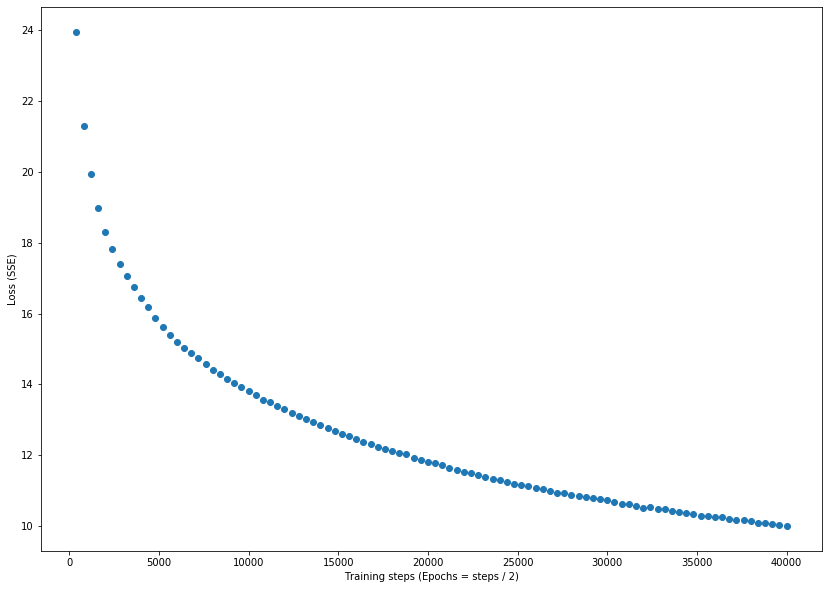

In [15]:
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)
plt.xlabel('Training steps (Epochs = steps / 2)')
plt.ylabel('Loss (SSE)')
plt.show()

In [16]:
pred = regressor.predict(input_fn=wx_input_fn(X_test,
                                              num_epochs=1,
                                              shuffle=False))
predictions = np.array([p['predictions'][0] for p in pred])

print("The Explained Variance: %.2f" % explained_variance_score(
                                            y_test, predictions))  
print("The Mean Absolute Error: %.2f degrees Celcius" % mean_absolute_error(
                                            y_test, predictions))  
print("The Median Absolute Error: %.2f degrees Celcius" % median_absolute_error(
                                            y_test, predictions))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-40000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
The Explained Variance: 0.92
The Mean Absolute Error: 2.39 degrees Celcius
The Median Absolute Error: 1.81 degrees Celcius


In [5]:
model.model.save("mode.h5")

NameError: name 'model' is not defined

In [4]:
evaluation.save_weights("model.h5")
print("Saved model to disk")

NameError: name 'evaluation' is not defined

In [7]:
regressor.fit(x,y)

NameError: name 'regressor' is not defined